# 시각화(이상치/결측치 제거 확인)

## 골목 / 골목외로 상권나눈 파일 전달받아옴

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/골목상권_230913.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   매출                      2472 non-null   float64
 1   기준_년_코드                 2472 non-null   int64  
 2   상권_구분_코드_명              2472 non-null   object 
 3   상권_코드                   2472 non-null   int64  
 4   상권_코드_명                 2472 non-null   object 
 5   시간대1                    2472 non-null   int64  
 6   시간대2                    2472 non-null   int64  
 7   시간대3                    2472 non-null   int64  
 8   시간대4                    2472 non-null   int64  
 9   시간대5                    2472 non-null   int64  
 10  분기_1                    2472 non-null   int64  
 11  분기_2                    2472 non-null   int64  
 12  분기_3                    2472 non-null   int64  
 13  area                    2472 non-null   int64  
 14  점포수                     2472 non-null   

In [2]:
from matplotlib import rc, font_manager as fm

# 나눔고딕 폰트 경로 설정
font_location = 'data/나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()

# 폰트 설정
rc('font', family=font_name)

### 이상치 개수 파악하기 함수(by IQR)

In [22]:
# 이상치 계산 함수
def detect_outliers_iqr(column, column_name):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum(), column_name


### 전체 개수 파악하기

In [25]:
pop_cols = df[['총_생활인구_수', '시간대_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수',
                    '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수', '토요일_생활인구_수',
                    '일요일_생활인구_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
                    '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수']]

for i in pop_cols:
    print(i)
    outliers_count, column_name = detect_outliers_iqr(df[i], i)
    total_count = len(df[i])
    outliers_ratio = outliers_count / total_count
    print(f'이상치 개수: {outliers_count} ({column_name})')
    print(f'전체 데이터 수 대비 이상치 비율: {outliers_ratio:.2%}')
    print('=============================')

총_생활인구_수
이상치 개수: 12 (총_생활인구_수)
전체 데이터 수 대비 이상치 비율: 0.49%
시간대_생활인구_수
이상치 개수: 69 (시간대_생활인구_수)
전체 데이터 수 대비 이상치 비율: 2.79%
월요일_생활인구_수
이상치 개수: 36 (월요일_생활인구_수)
전체 데이터 수 대비 이상치 비율: 1.46%
화요일_생활인구_수
이상치 개수: 24 (화요일_생활인구_수)
전체 데이터 수 대비 이상치 비율: 0.97%
수요일_생활인구_수
이상치 개수: 42 (수요일_생활인구_수)
전체 데이터 수 대비 이상치 비율: 1.70%
목요일_생활인구_수
이상치 개수: 36 (목요일_생활인구_수)
전체 데이터 수 대비 이상치 비율: 1.46%
금요일_생활인구_수
이상치 개수: 6 (금요일_생활인구_수)
전체 데이터 수 대비 이상치 비율: 0.24%
토요일_생활인구_수
이상치 개수: 12 (토요일_생활인구_수)
전체 데이터 수 대비 이상치 비율: 0.49%
일요일_생활인구_수
이상치 개수: 18 (일요일_생활인구_수)
전체 데이터 수 대비 이상치 비율: 0.73%
연령대_10_생활인구_수
이상치 개수: 180 (연령대_10_생활인구_수)
전체 데이터 수 대비 이상치 비율: 7.28%
연령대_20_생활인구_수
이상치 개수: 54 (연령대_20_생활인구_수)
전체 데이터 수 대비 이상치 비율: 2.18%
연령대_30_생활인구_수
이상치 개수: 12 (연령대_30_생활인구_수)
전체 데이터 수 대비 이상치 비율: 0.49%
연령대_40_생활인구_수
이상치 개수: 6 (연령대_40_생활인구_수)
전체 데이터 수 대비 이상치 비율: 0.24%
연령대_50_생활인구_수
이상치 개수: 12 (연령대_50_생활인구_수)
전체 데이터 수 대비 이상치 비율: 0.49%
연령대_60_이상_생활인구_수
이상치 개수: 18 (연령대_60_이상_생활인구_수)
전체 데이터 수 대비 이상치 비율: 0.73%


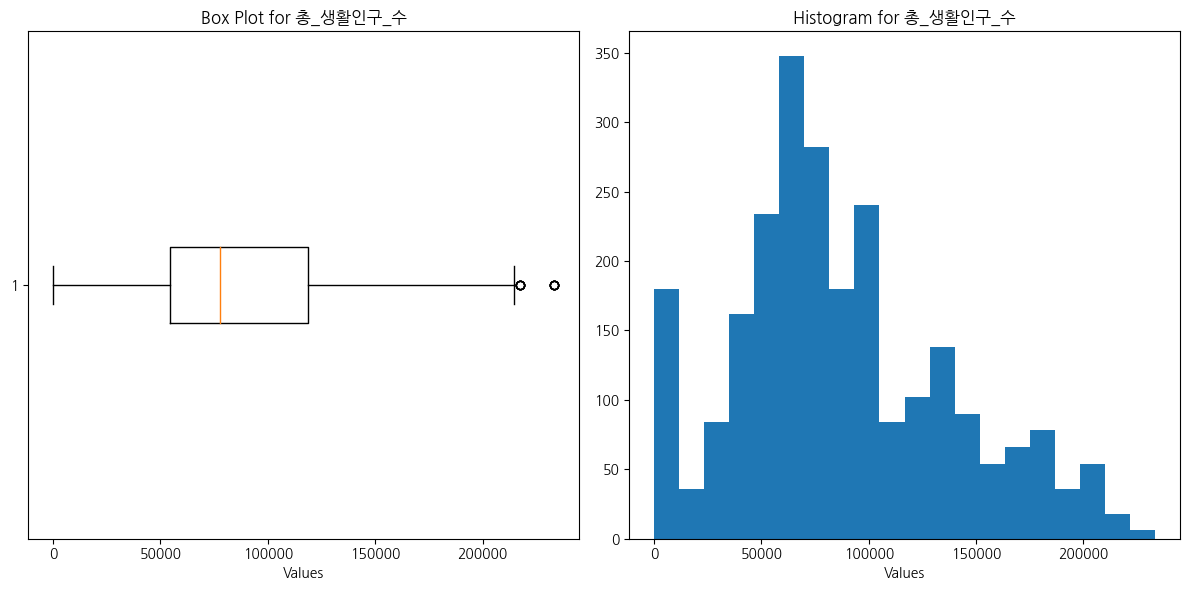

총_생활인구_수의 이상치 개수: 12


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, you'll need to load or create it before this point

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: Box Plot
ax1.boxplot(df['총_생활인구_수'], vert=False)
ax1.set_title('Box Plot for 총_생활인구_수')
ax1.set_xlabel('Values')

# Right subplot: Histogram
ax2.hist(df['총_생활인구_수'], bins=20)  # You can adjust the number of bins as needed
ax2.set_title('Histogram for 총_생활인구_수')
ax2.set_xlabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# 이상치 개수 측정
outliers_count, column_name = detect_outliers_iqr(df['총_생활인구_수'], '총_생활인구_수')
print(f'{column_name}의 이상치 개수: {outliers_count}')

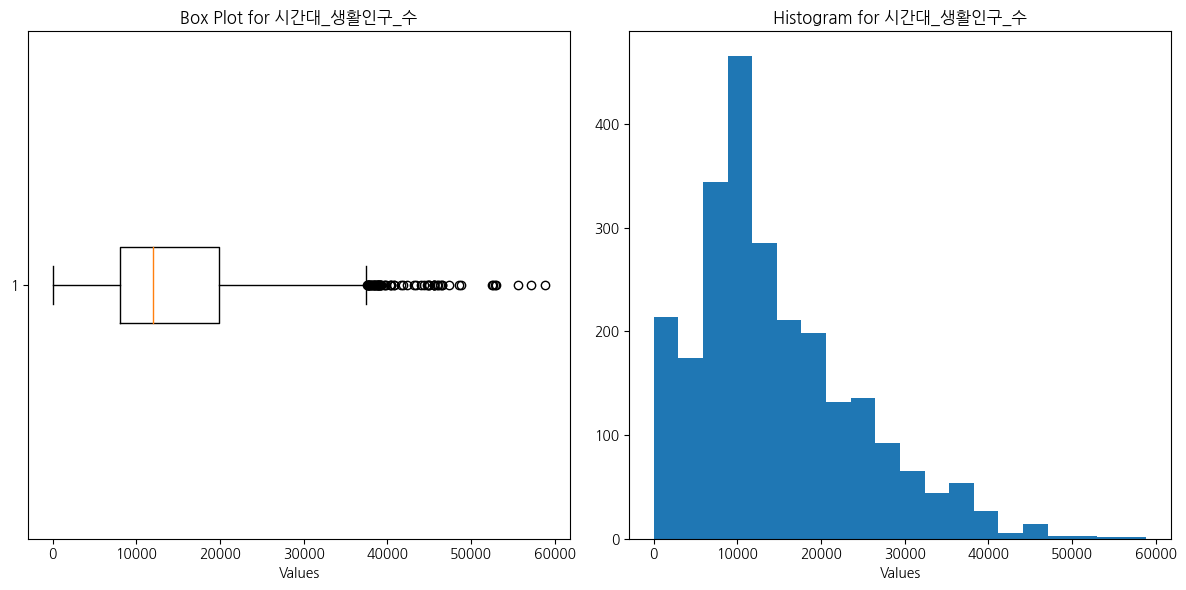

시간대_생활인구_수의 이상치 개수: 69


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, you'll need to load or create it before this point

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: Box Plot
ax1.boxplot(df['시간대_생활인구_수'], vert=False)
ax1.set_title('Box Plot for 시간대_생활인구_수')
ax1.set_xlabel('Values')

# Right subplot: Histogram
ax2.hist(df['시간대_생활인구_수'], bins=20)  # You can adjust the number of bins as needed
ax2.set_title('Histogram for 시간대_생활인구_수')
ax2.set_xlabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# 이상치 개수 측정
outliers_count, column_name = detect_outliers_iqr(df['시간대_생활인구_수'], '시간대_생활인구_수')
print(f'{column_name}의 이상치 개수: {outliers_count}')

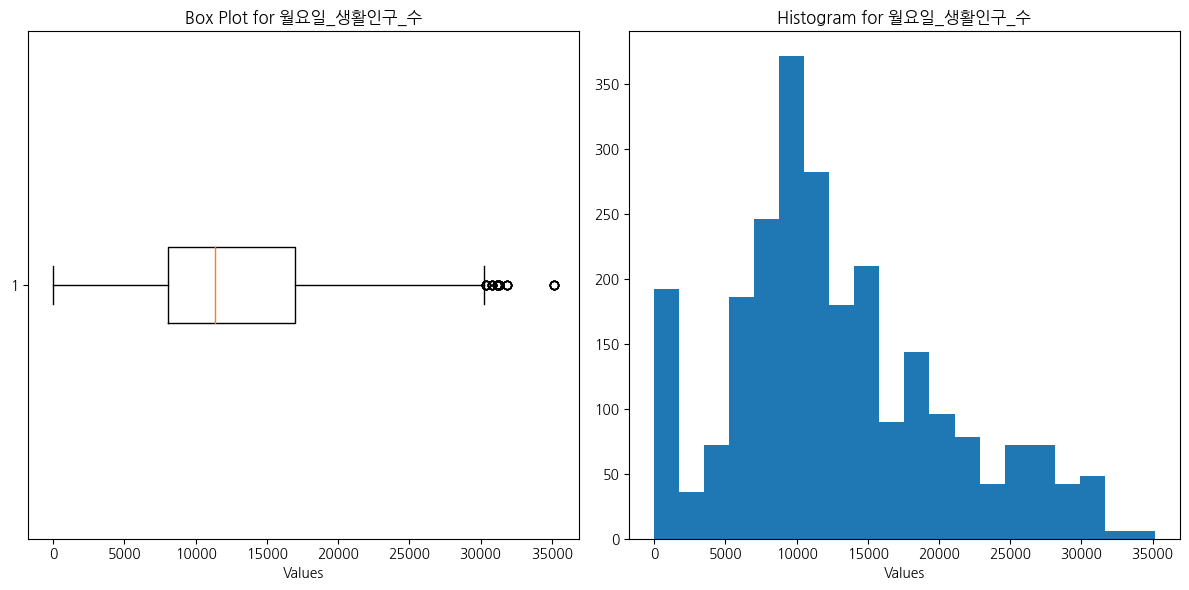

월요일_생활인구_수의 이상치 개수: 36


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, you'll need to load or create it before this point

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: Box Plot
ax1.boxplot(df['월요일_생활인구_수'], vert=False)
ax1.set_title('Box Plot for 월요일_생활인구_수')
ax1.set_xlabel('Values')

# Right subplot: Histogram
ax2.hist(df['월요일_생활인구_수'], bins=20)  # You can adjust the number of bins as needed
ax2.set_title('Histogram for 월요일_생활인구_수')
ax2.set_xlabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# 이상치 개수 측정
outliers_count, column_name = detect_outliers_iqr(df['월요일_생활인구_수'], '월요일_생활인구_수')
print(f'{column_name}의 이상치 개수: {outliers_count}')

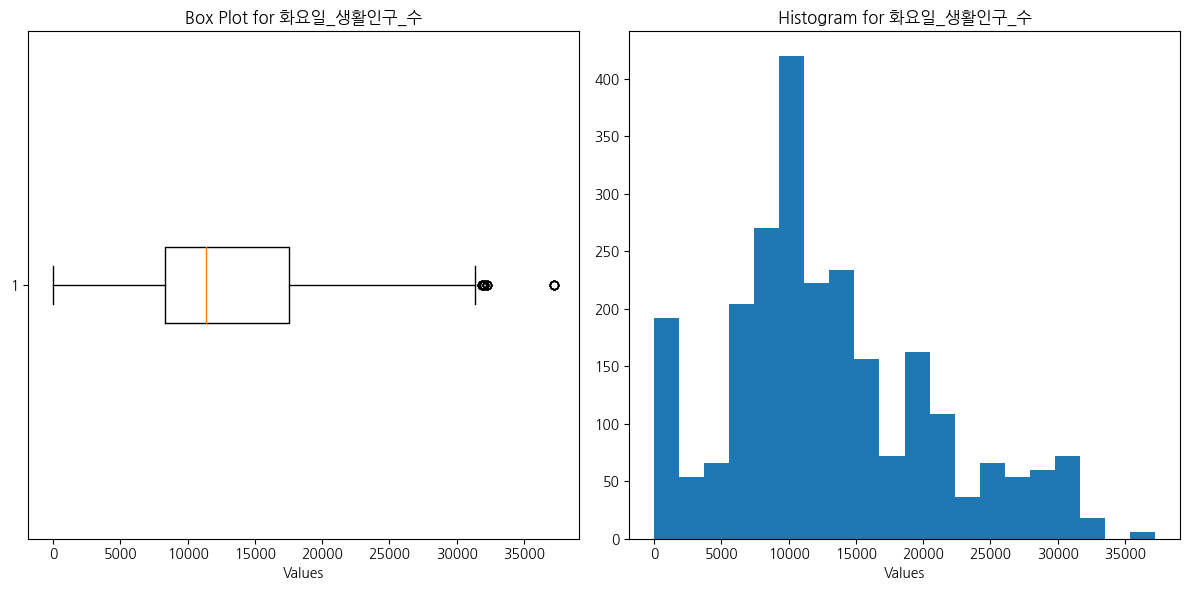

화요일_생활인구_수의 이상치 개수: 24


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, you'll need to load or create it before this point

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: Box Plot
ax1.boxplot(df['화요일_생활인구_수'], vert=False)
ax1.set_title('Box Plot for 화요일_생활인구_수')
ax1.set_xlabel('Values')

# Right subplot: Histogram
ax2.hist(df['화요일_생활인구_수'], bins=20)  # You can adjust the number of bins as needed
ax2.set_title('Histogram for 화요일_생활인구_수')
ax2.set_xlabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# 이상치 개수 측정
outliers_count, column_name = detect_outliers_iqr(df['화요일_생활인구_수'], '화요일_생활인구_수')
print(f'{column_name}의 이상치 개수: {outliers_count}')

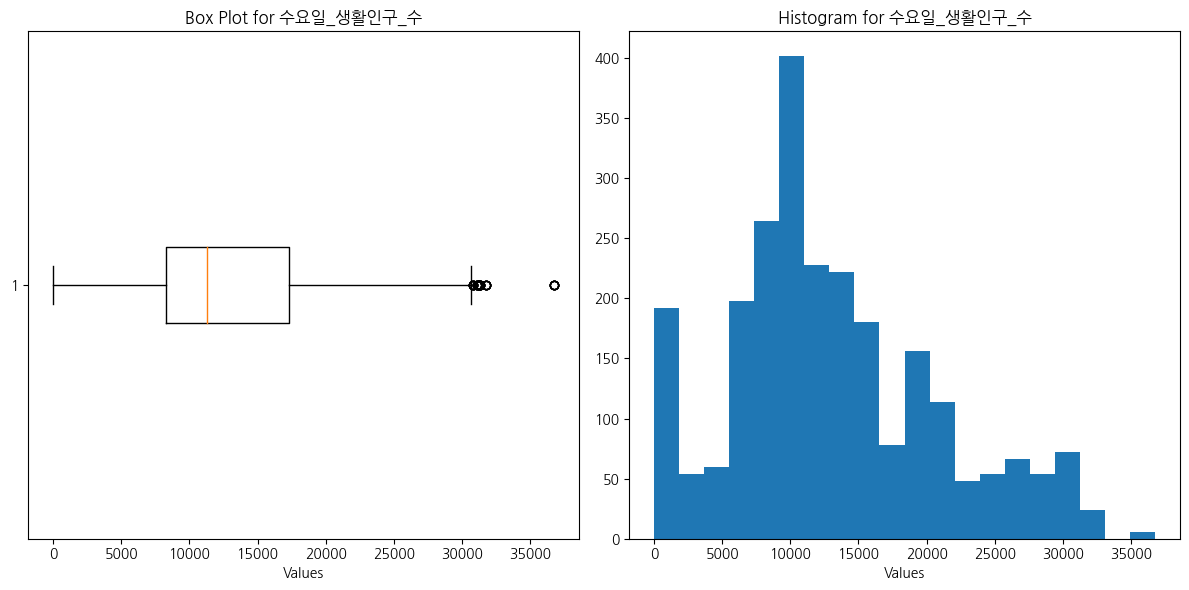

수요일_생활인구_수의 이상치 개수: 42


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, you'll need to load or create it before this point

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: Box Plot
ax1.boxplot(df['수요일_생활인구_수'], vert=False)
ax1.set_title('Box Plot for 수요일_생활인구_수')
ax1.set_xlabel('Values')

# Right subplot: Histogram
ax2.hist(df['수요일_생활인구_수'], bins=20)  # You can adjust the number of bins as needed
ax2.set_title('Histogram for 수요일_생활인구_수')
ax2.set_xlabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# 이상치 개수 측정
outliers_count, column_name = detect_outliers_iqr(df['수요일_생활인구_수'], '수요일_생활인구_수')
print(f'{column_name}의 이상치 개수: {outliers_count}')

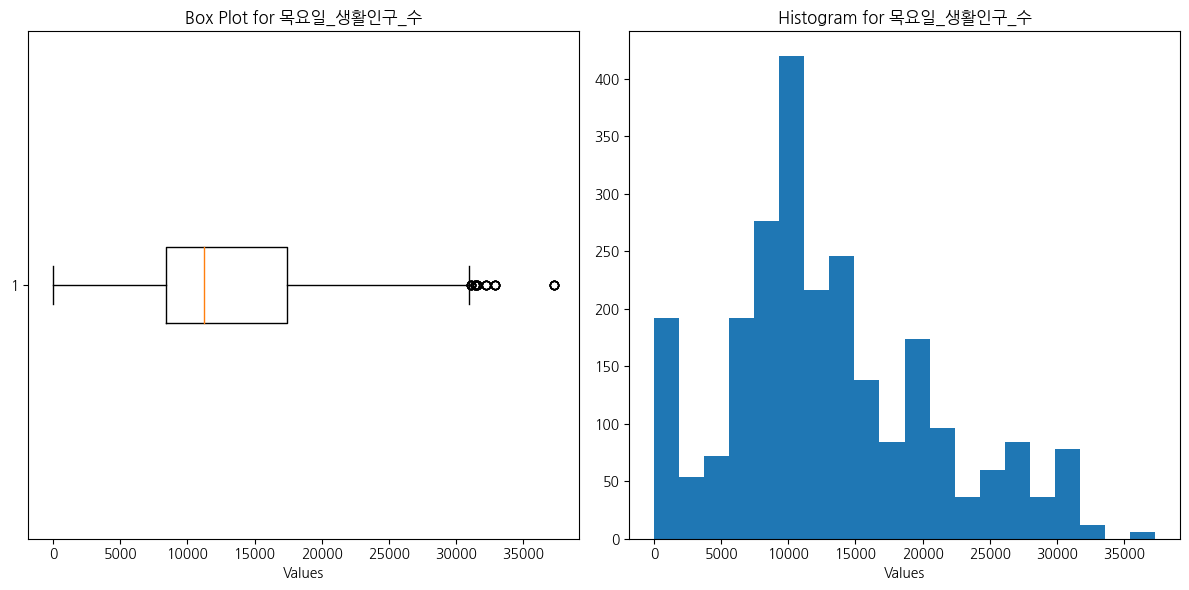

목요일_생활인구_수의 이상치 개수: 36


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, you'll need to load or create it before this point

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: Box Plot
ax1.boxplot(df['목요일_생활인구_수'], vert=False)
ax1.set_title('Box Plot for 목요일_생활인구_수')
ax1.set_xlabel('Values')

# Right subplot: Histogram
ax2.hist(df['목요일_생활인구_수'], bins=20)  # You can adjust the number of bins as needed
ax2.set_title('Histogram for 목요일_생활인구_수')
ax2.set_xlabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# 이상치 개수 측정
outliers_count, column_name = detect_outliers_iqr(df['목요일_생활인구_수'], '목요일_생활인구_수')
print(f'{column_name}의 이상치 개수: {outliers_count}')

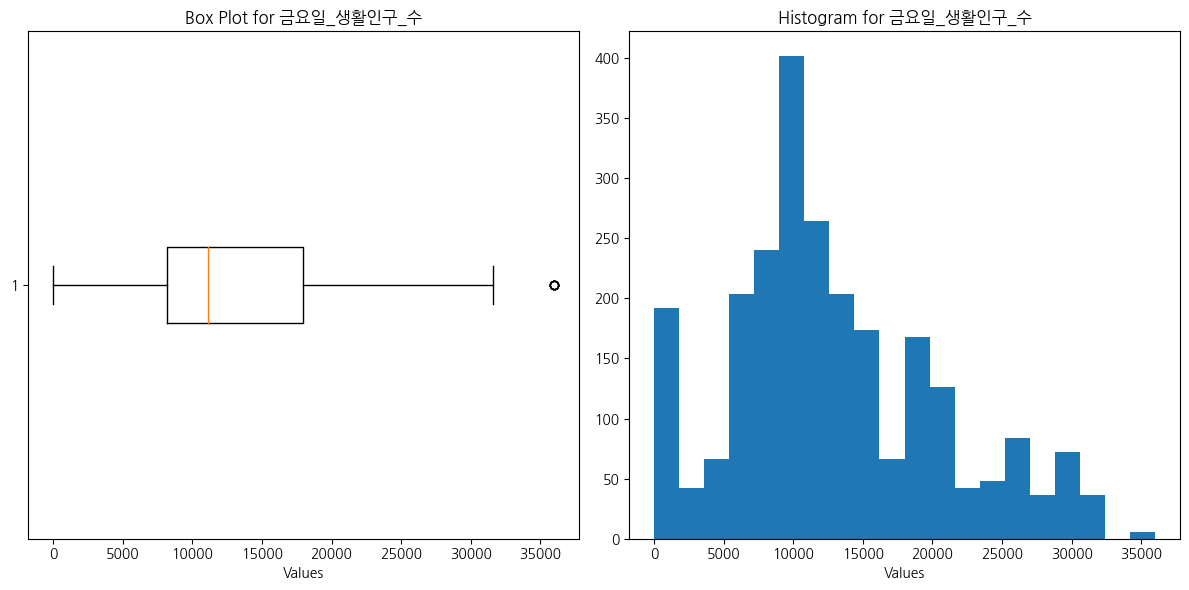

금요일_생활인구_수의 이상치 개수: 6


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, you'll need to load or create it before this point

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: Box Plot
ax1.boxplot(df['금요일_생활인구_수'], vert=False)
ax1.set_title('Box Plot for 금요일_생활인구_수')
ax1.set_xlabel('Values')

# Right subplot: Histogram
ax2.hist(df['금요일_생활인구_수'], bins=20)  # You can adjust the number of bins as needed
ax2.set_title('Histogram for 금요일_생활인구_수')
ax2.set_xlabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# 이상치 개수 측정
outliers_count, column_name = detect_outliers_iqr(df['금요일_생활인구_수'], '금요일_생활인구_수')
print(f'{column_name}의 이상치 개수: {outliers_count}')

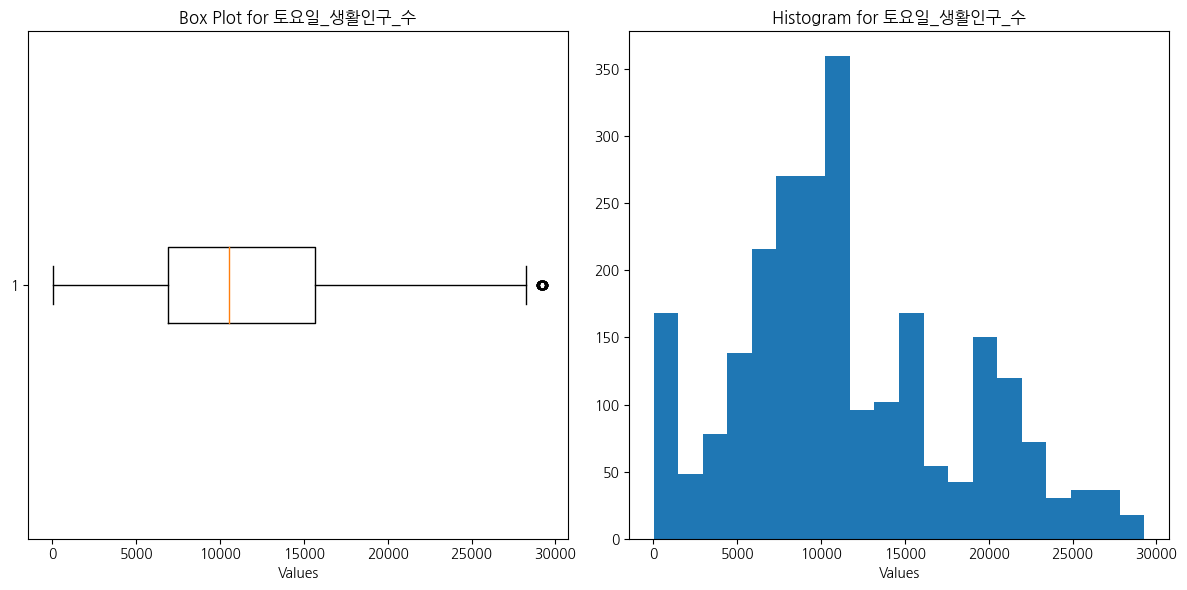

토요일_생활인구_수의 이상치 개수: 12


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, you'll need to load or create it before this point

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: Box Plot
ax1.boxplot(df['토요일_생활인구_수'], vert=False)
ax1.set_title('Box Plot for 토요일_생활인구_수')
ax1.set_xlabel('Values')

# Right subplot: Histogram
ax2.hist(df['토요일_생활인구_수'], bins=20)  # You can adjust the number of bins as needed
ax2.set_title('Histogram for 토요일_생활인구_수')
ax2.set_xlabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# 이상치 개수 측정
outliers_count, column_name = detect_outliers_iqr(df['토요일_생활인구_수'], '토요일_생활인구_수')
print(f'{column_name}의 이상치 개수: {outliers_count}')

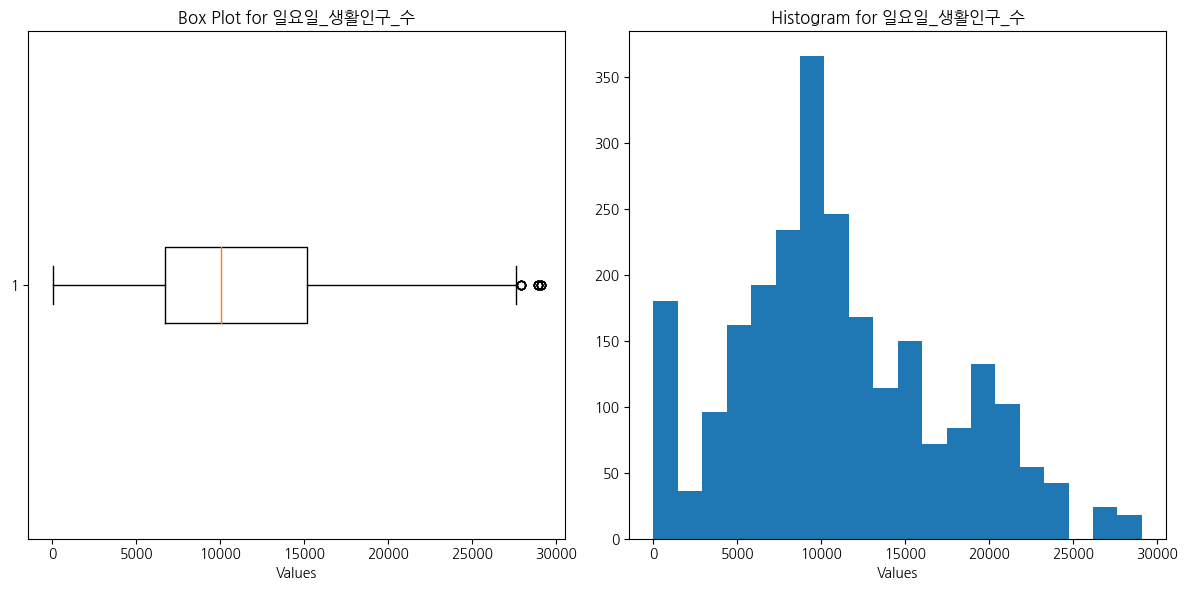

일요일_생활인구_수의 이상치 개수: 18


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, you'll need to load or create it before this point

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: Box Plot
ax1.boxplot(df['일요일_생활인구_수'], vert=False)
ax1.set_title('Box Plot for 일요일_생활인구_수')
ax1.set_xlabel('Values')

# Right subplot: Histogram
ax2.hist(df['일요일_생활인구_수'], bins=20)  # You can adjust the number of bins as needed
ax2.set_title('Histogram for 일요일_생활인구_수')
ax2.set_xlabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# 이상치 개수 측정
outliers_count, column_name = detect_outliers_iqr(df['일요일_생활인구_수'], '일요일_생활인구_수')
print(f'{column_name}의 이상치 개수: {outliers_count}')

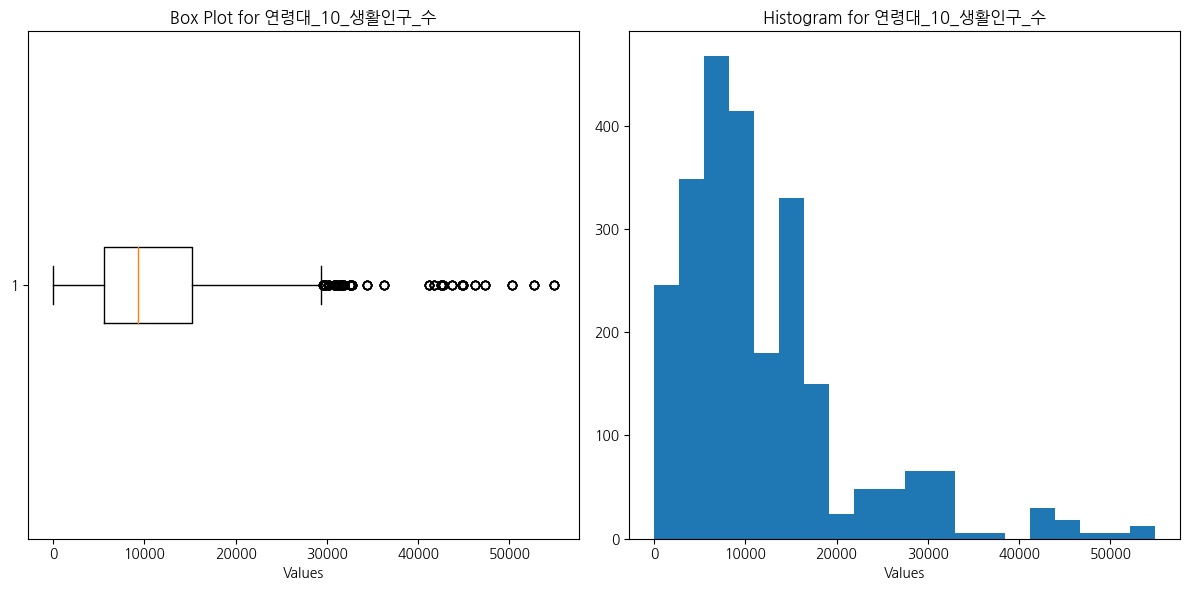

연령대_10_생활인구_수의 이상치 개수: 180


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, you'll need to load or create it before this point

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: Box Plot
ax1.boxplot(df['연령대_10_생활인구_수'], vert=False)
ax1.set_title('Box Plot for 연령대_10_생활인구_수')
ax1.set_xlabel('Values')

# Right subplot: Histogram
ax2.hist(df['연령대_10_생활인구_수'], bins=20)  # You can adjust the number of bins as needed
ax2.set_title('Histogram for 연령대_10_생활인구_수')
ax2.set_xlabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# 이상치 개수 측정
outliers_count, column_name = detect_outliers_iqr(df['연령대_10_생활인구_수'], '연령대_10_생활인구_수')
print(f'{column_name}의 이상치 개수: {outliers_count}')

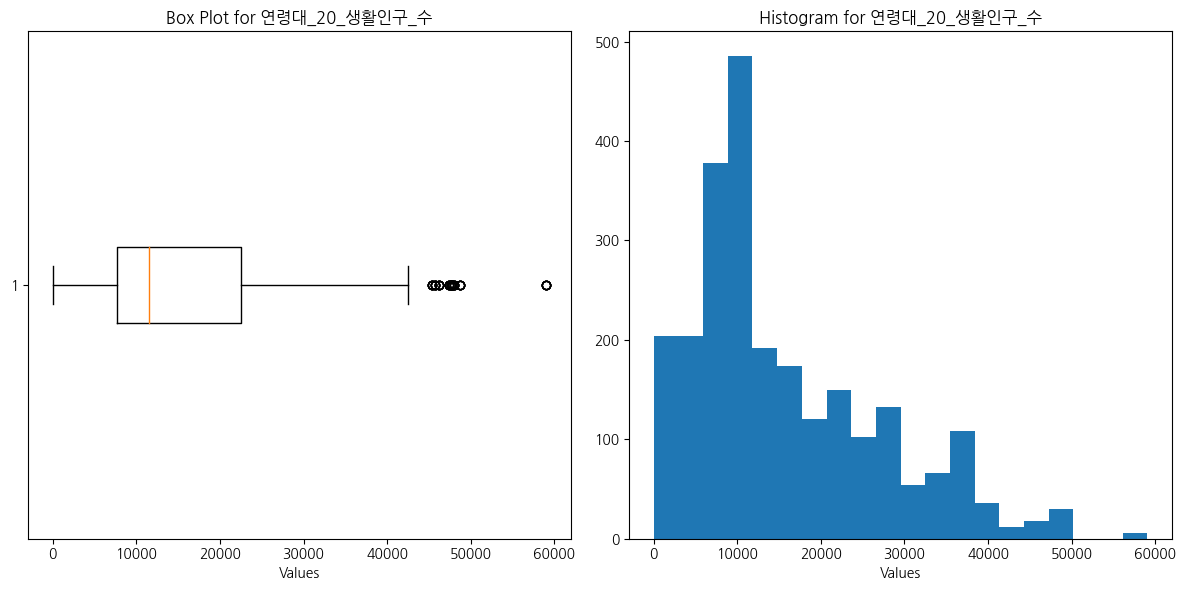

연령대_20_생활인구_수의 이상치 개수: 54


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, you'll need to load or create it before this point

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: Box Plot
ax1.boxplot(df['연령대_20_생활인구_수'], vert=False)
ax1.set_title('Box Plot for 연령대_20_생활인구_수')
ax1.set_xlabel('Values')

# Right subplot: Histogram
ax2.hist(df['연령대_20_생활인구_수'], bins=20)  # You can adjust the number of bins as needed
ax2.set_title('Histogram for 연령대_20_생활인구_수')
ax2.set_xlabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# 이상치 개수 측정
outliers_count, column_name = detect_outliers_iqr(df['연령대_20_생활인구_수'], '연령대_20_생활인구_수')
print(f'{column_name}의 이상치 개수: {outliers_count}')

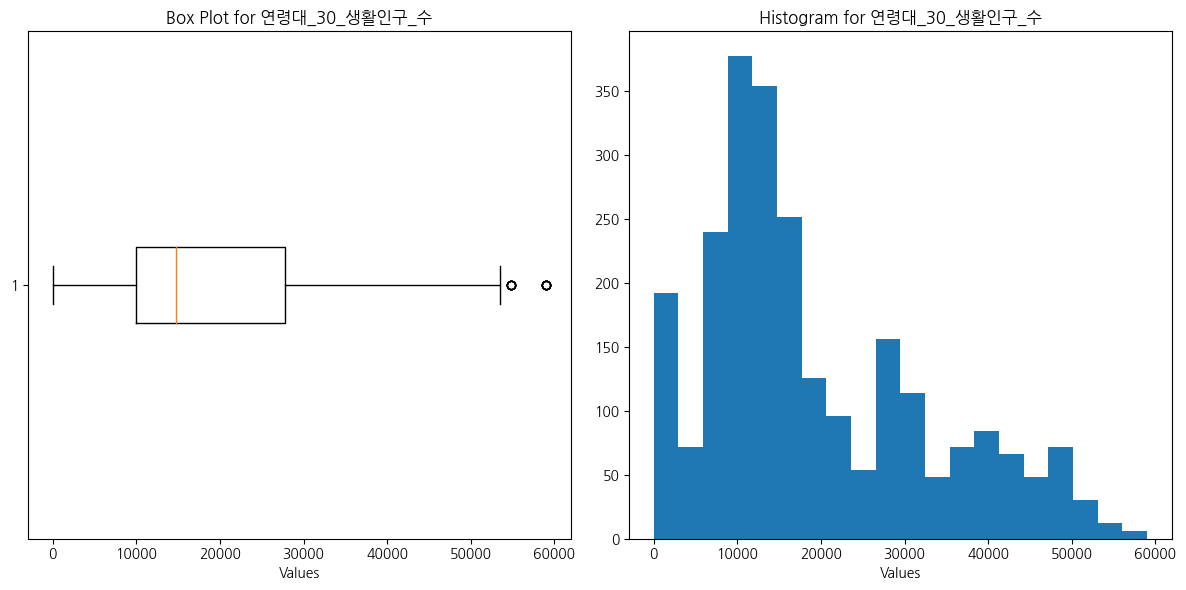

연령대_30_생활인구_수의 이상치 개수: 12


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, you'll need to load or create it before this point

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: Box Plot
ax1.boxplot(df['연령대_30_생활인구_수'], vert=False)
ax1.set_title('Box Plot for 연령대_30_생활인구_수')
ax1.set_xlabel('Values')

# Right subplot: Histogram
ax2.hist(df['연령대_30_생활인구_수'], bins=20)  # You can adjust the number of bins as needed
ax2.set_title('Histogram for 연령대_30_생활인구_수')
ax2.set_xlabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# 이상치 개수 측정
outliers_count, column_name = detect_outliers_iqr(df['연령대_30_생활인구_수'], '연령대_30_생활인구_수')
print(f'{column_name}의 이상치 개수: {outliers_count}')

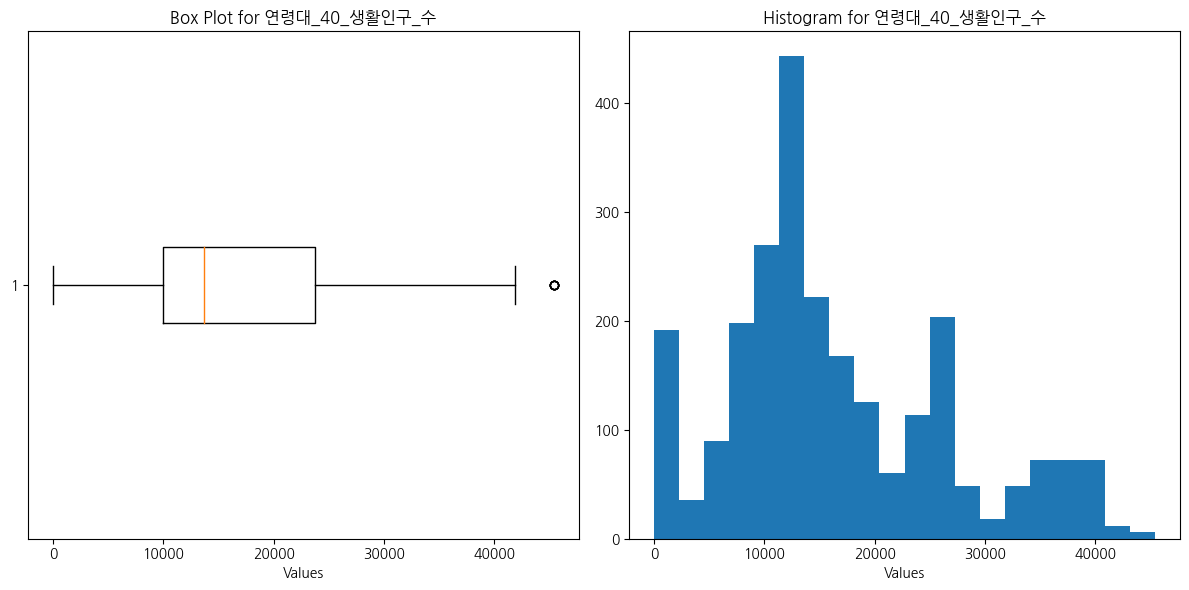

연령대_40_생활인구_수의 이상치 개수: 6


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, you'll need to load or create it before this point

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: Box Plot
ax1.boxplot(df['연령대_40_생활인구_수'], vert=False)
ax1.set_title('Box Plot for 연령대_40_생활인구_수')
ax1.set_xlabel('Values')

# Right subplot: Histogram
ax2.hist(df['연령대_40_생활인구_수'], bins=20)  # You can adjust the number of bins as needed
ax2.set_title('Histogram for 연령대_40_생활인구_수')
ax2.set_xlabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# 이상치 개수 측정
outliers_count, column_name = detect_outliers_iqr(df['연령대_40_생활인구_수'], '연령대_40_생활인구_수')
print(f'{column_name}의 이상치 개수: {outliers_count}')

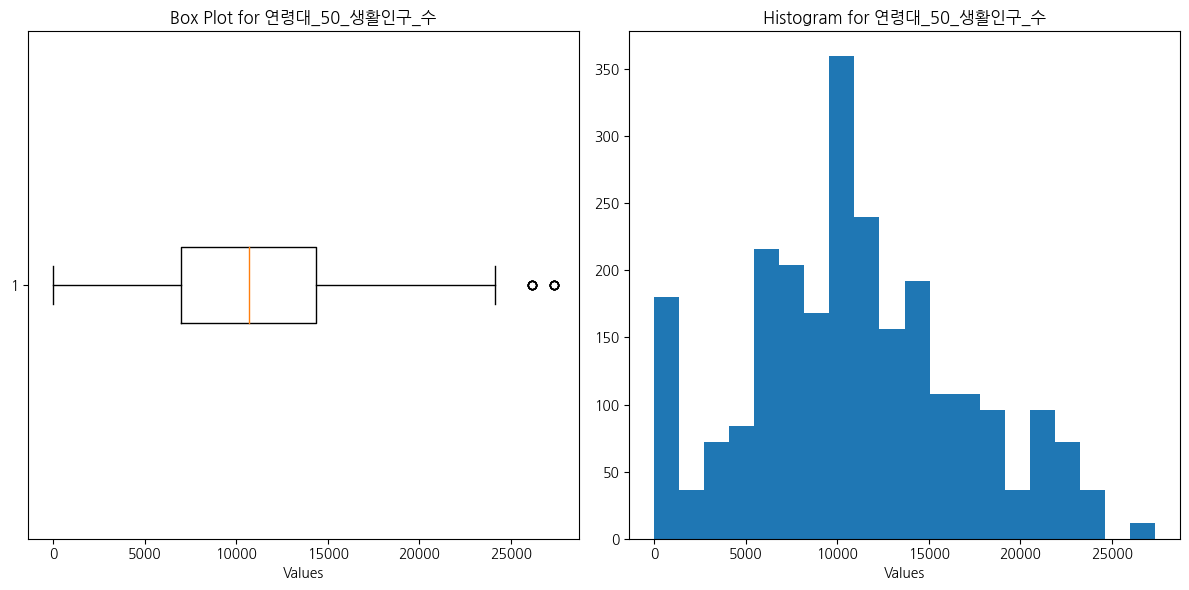

연령대_50_생활인구_수의 이상치 개수: 12


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, you'll need to load or create it before this point

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: Box Plot
ax1.boxplot(df['연령대_50_생활인구_수'], vert=False)
ax1.set_title('Box Plot for 연령대_50_생활인구_수')
ax1.set_xlabel('Values')

# Right subplot: Histogram
ax2.hist(df['연령대_50_생활인구_수'], bins=20)  # You can adjust the number of bins as needed
ax2.set_title('Histogram for 연령대_50_생활인구_수')
ax2.set_xlabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# 이상치 개수 측정
outliers_count, column_name = detect_outliers_iqr(df['연령대_50_생활인구_수'], '연령대_50_생활인구_수')
print(f'{column_name}의 이상치 개수: {outliers_count}')

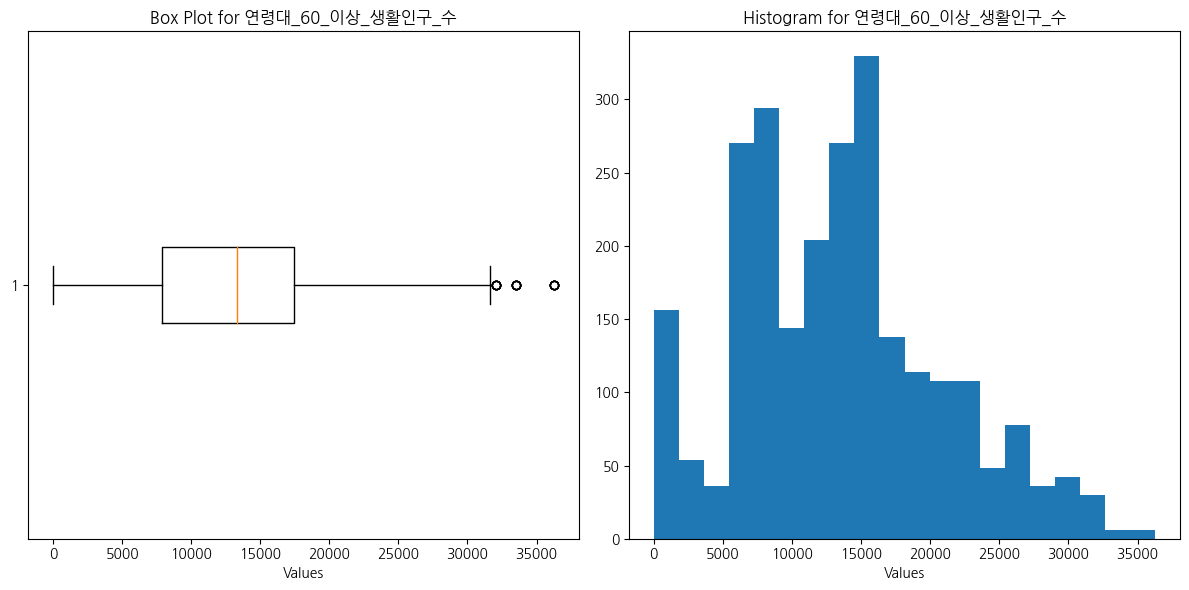

연령대_60_이상_생활인구_수의 이상치 개수: 18


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, you'll need to load or create it before this point

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: Box Plot
ax1.boxplot(df['연령대_60_이상_생활인구_수'], vert=False)
ax1.set_title('Box Plot for 연령대_60_이상_생활인구_수')
ax1.set_xlabel('Values')

# Right subplot: Histogram
ax2.hist(df['연령대_60_이상_생활인구_수'], bins=20)  # You can adjust the number of bins as needed
ax2.set_title('Histogram for 연령대_60_이상_생활인구_수')
ax2.set_xlabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# 이상치 개수 측정
outliers_count, column_name = detect_outliers_iqr(df['연령대_60_이상_생활인구_수'], '연령대_60_이상_생활인구_수')
print(f'{column_name}의 이상치 개수: {outliers_count}')

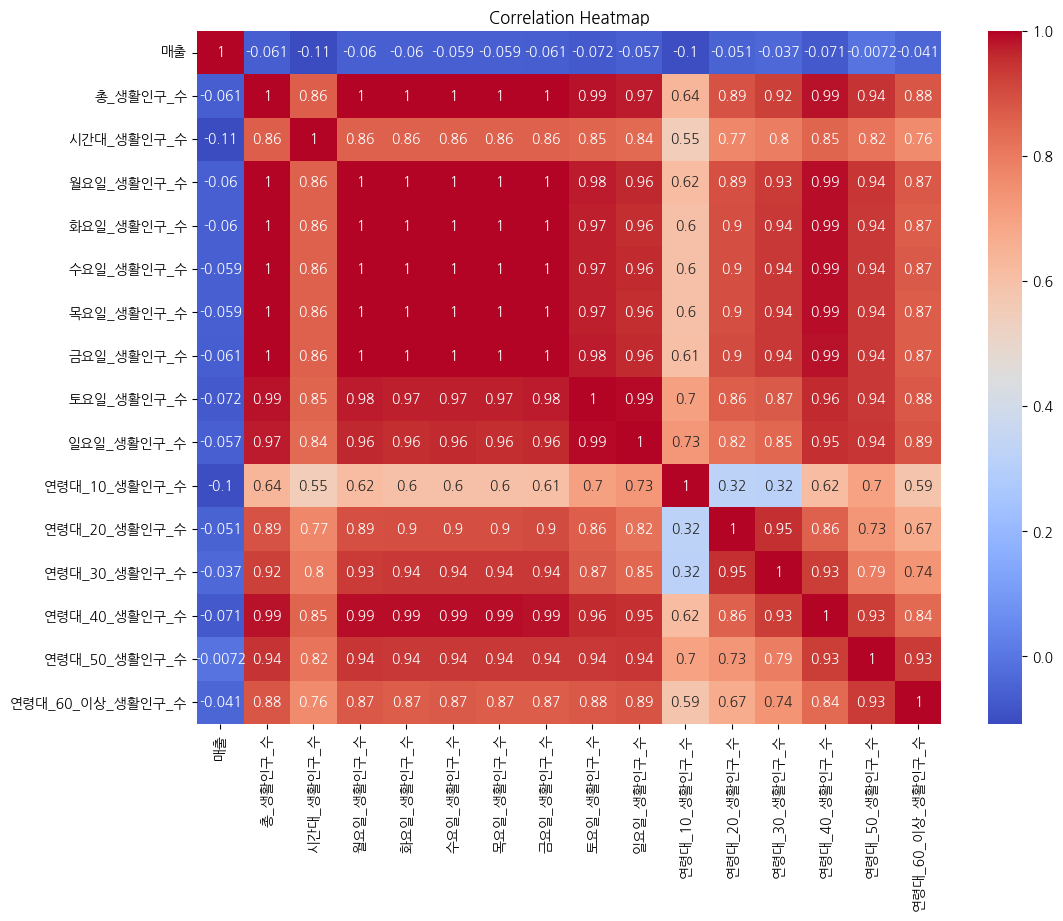

In [19]:
# 위에서 선택한 칼럼들로 새로운 DataFrame 생성
df_cor = df[['매출','총_생활인구_수', '시간대_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수',
                    '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수', '토요일_생활인구_수',
                    '일요일_생활인구_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
                    '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수']]

corr_matrix = df_cor.corr()

# heatmap 그리기
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [21]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 독립변수의 데이터프레임을 선택 (숫자형 데이터만 가능)
X = df_cor

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


             feature           VIF
0                 매출  2.113718e+00
1           총_생활인구_수  2.018963e+11
2         시간대_생활인구_수  1.268664e+01
3         월요일_생활인구_수  1.753206e+09
4         화요일_생활인구_수  1.832943e+09
5         수요일_생활인구_수  1.826466e+09
6         목요일_생활인구_수  1.834136e+09
7         금요일_생활인구_수  1.781239e+09
8         토요일_생활인구_수  1.410099e+09
9         일요일_생활인구_수  1.295715e+09
10     연령대_10_생활인구_수  2.814563e+09
11     연령대_20_생활인구_수  4.523642e+09
12     연령대_30_생활인구_수  6.608863e+09
13     연령대_40_생활인구_수  4.600220e+09
14     연령대_50_생활인구_수  1.905638e+09
15  연령대_60_이상_생활인구_수  2.846911e+09
